In [36]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import warnings
warnings.filterwarnings(action='ignore')

https://drive.google.com/file/d/1LOcqrzuAGIsCmeKRdSeDTcPHxETvWSgW/view?usp=drive_link

In [37]:
airP = pd.read_csv('airline-passenger-traffic.csv', header=None)
airP.columns = ['Month', 'Passengers']

In [38]:
airP['Month'] = pd.to_datetime(airP['Month'], format='%Y-%m')
airP.set_index('Month', inplace=True)
airP.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [39]:
airP.isna().sum()

Passengers    4
dtype: int64

### TIme series Data

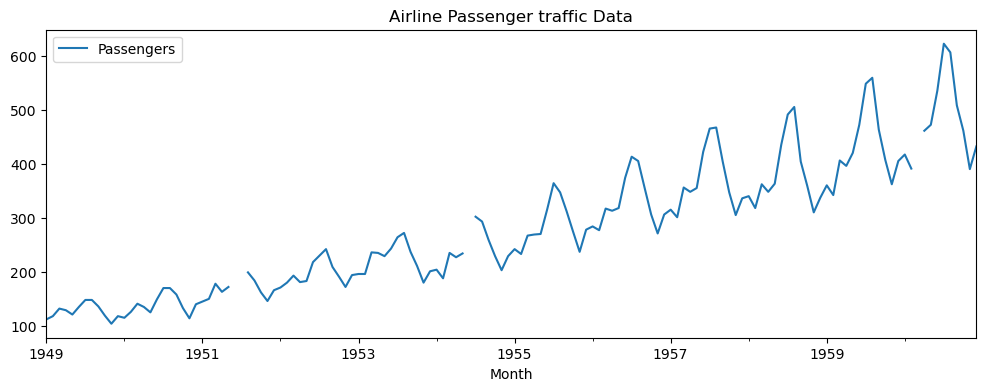

In [40]:
airP.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Airline Passenger traffic Data')
plt.show(block=False)

### Missing value imputation

In [41]:
airP.assign(passenger_mean_imputation = airP.fillna(airP.Passengers.mean()))

,Passengers,passenger_mean_imputation
Month,,
1949-01-01,112.0,112.0
1949-02-01,118.0,118.0
1949-03-01,132.0,132.0
1949-04-01,129.0,129.0
1949-05-01,121.0,121.0
...,...,...
1960-08-01,606.0,606.0
1960-09-01,508.0,508.0
1960-10-01,461.0,461.0


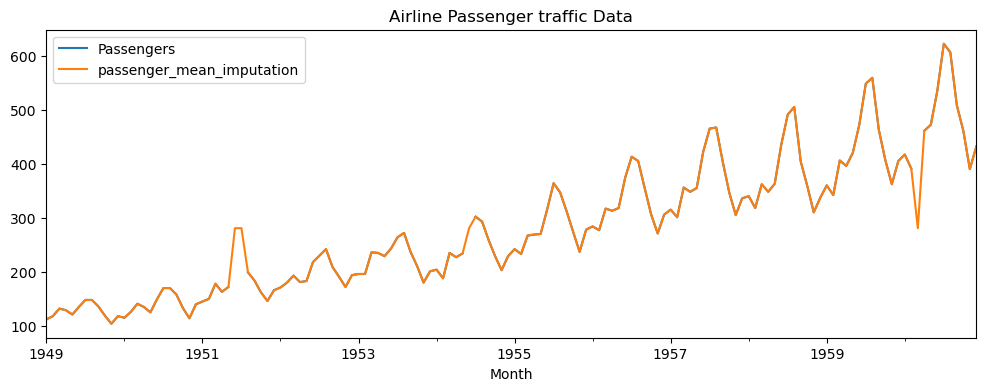

In [42]:
temp = airP.assign(passenger_mean_imputation = airP.fillna(airP.Passengers.mean()))
temp.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Airline Passenger traffic Data')
plt.show(block=False)

In [43]:
airP = airP.assign(Passengers_Linear_Interpolation=airP.Passengers.interpolate(method='linear'))

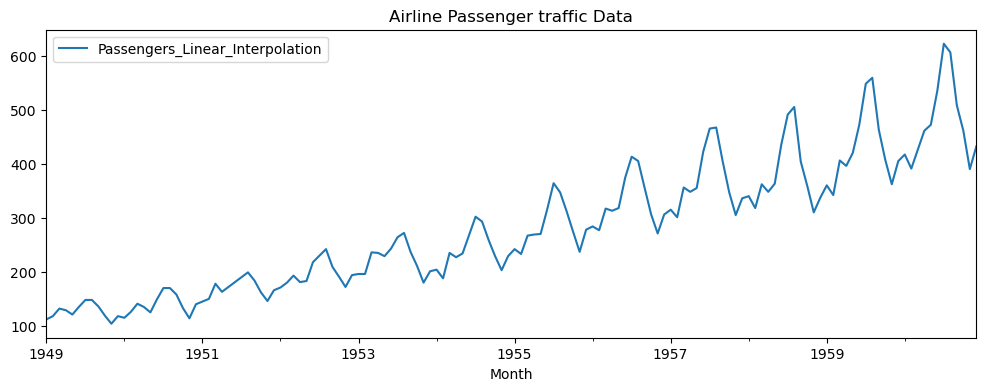

In [44]:
airP[['Passengers_Linear_Interpolation']].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Airline Passenger traffic Data')
plt.show(block=False)

In [45]:
airP['Passengers'] = airP['Passengers_Linear_Interpolation']
airP.drop(columns=['Passengers_Linear_Interpolation'],inplace=True, axis=1)

In [46]:
metrail = pd.read_csv('Metrail+dataset.csv')

In [47]:
metrail.describe()

,Travellers('000)
count,148.000000
mean,1837.547297
std,177.907923
min,1376.000000
25%,1718.250000
50%,1843.500000
75%,1976.250000
max,2236.000000


https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87#:~:text=One%20way%20to%20impute%20missing,with%20the%20previously%20observed%20value.

 -- other option : Use the command fillna(method ='pad')

In [48]:
metrail = metrail.fillna(method='bfill') # last observed value filled

In [49]:
metrail.describe()

,Travellers('000)
count,159.000000
mean,1834.446541
std,177.327297
min,1376.000000
25%,1711.500000
50%,1842.000000
75%,1973.500000
max,2236.000000


In [50]:
metrail.head()

,Month,Travellers('000)
0,Jan-91,1724.0
1,Feb-91,1638.0
2,Mar-91,1987.0
3,Apr-91,1825.0
4,May-91,1879.0


In [51]:
metrail = metrail.fillna(metrail[['Travellers(\'000)']].interpolate(method='linear'))

In [52]:
metrail.describe()

,Travellers('000)
count,159.000000
mean,1834.446541
std,177.327297
min,1376.000000
25%,1711.500000
50%,1842.000000
75%,1973.500000
max,2236.000000


In [53]:
import seaborn as sns

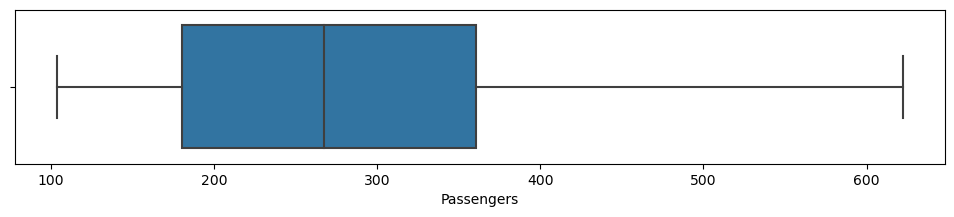

In [54]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(x=airP['Passengers'], whis=1.5)

- iqr = 3rd quatile - 1st quatile
- lower whisker = 1st quatile - 1.5*iqr
- upper whister = 3rd quatile + 1.5*iqr

Whis = whisker = 1.5

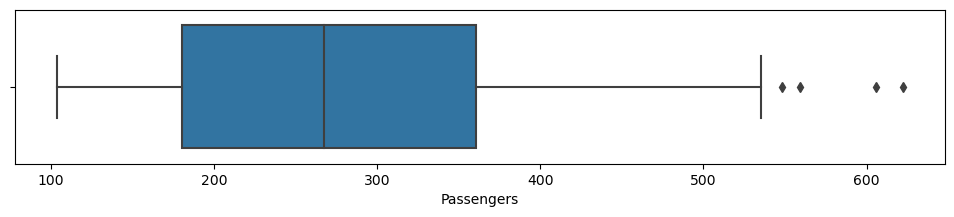

In [55]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(x=airP['Passengers'], whis=1)

In [56]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize']= 12,8
decomposition = sm.tsa.seasonal_decompose(airP.Passengers, model='additive')

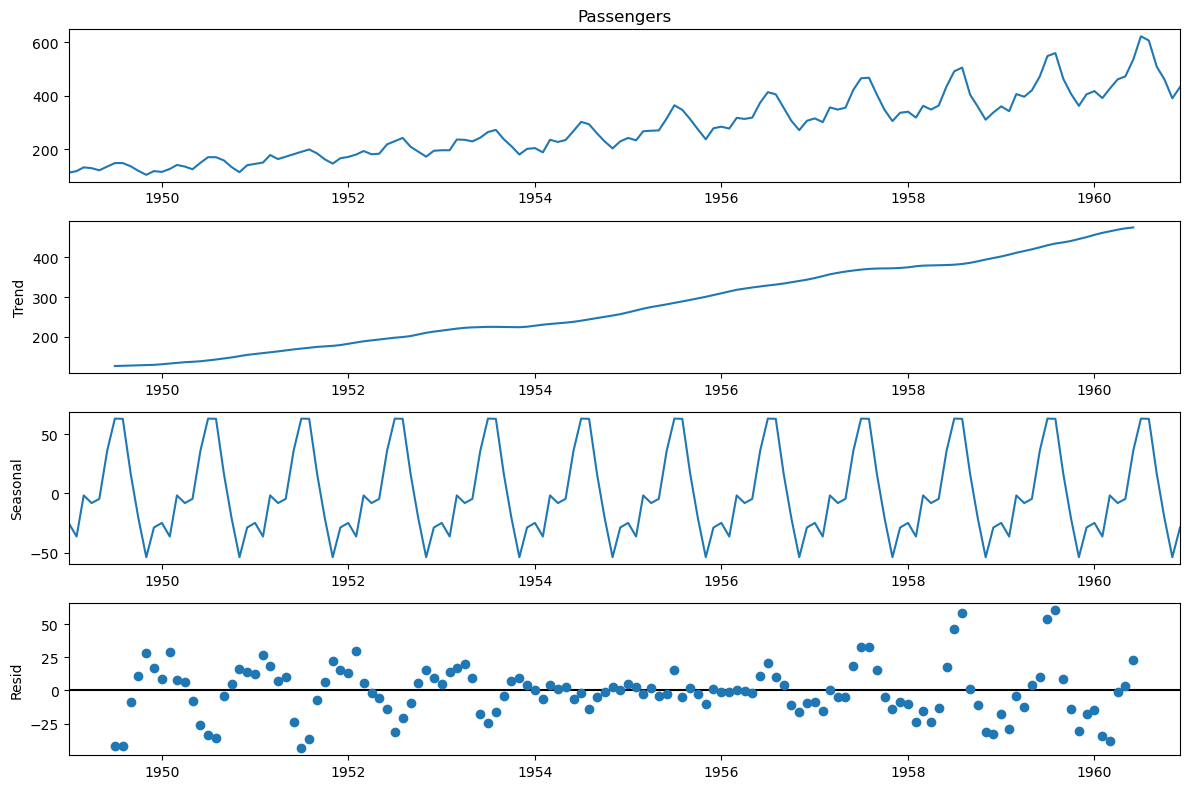

In [57]:
fig = decomposition.plot()
plt.show()

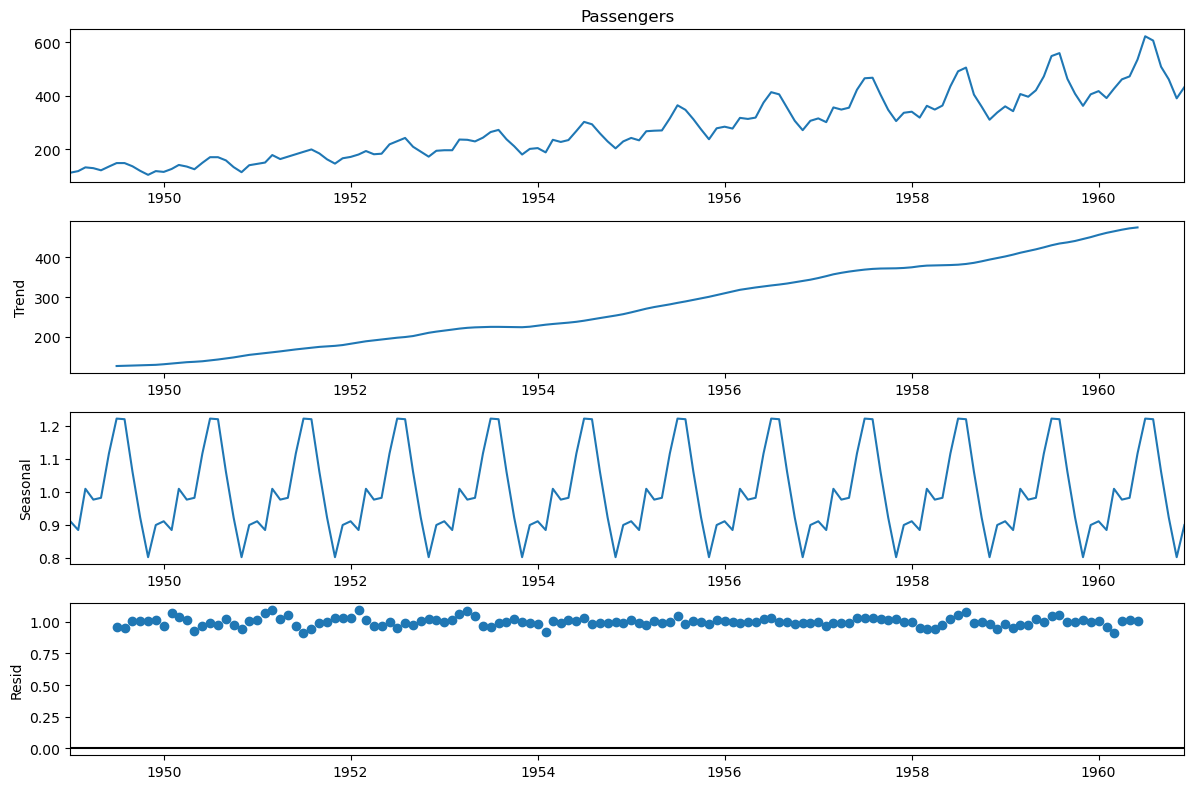

In [58]:
decomposition = sm.tsa.seasonal_decompose(airP.Passengers, model='multiplicative')
fig = decomposition.plot()
plt.show()

### SIME average (Evaluate the Model)

In [59]:
test = airP[120:]
train = airP[:120]

In [60]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Passengers'].mean()

#### Plot 

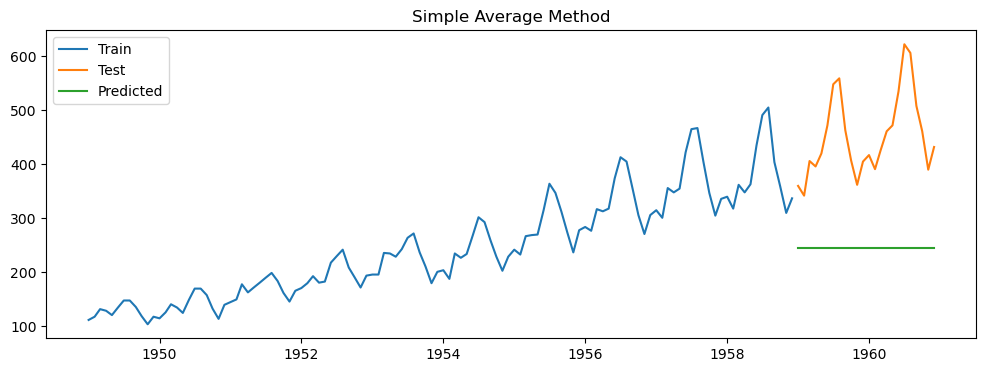

In [61]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Predicted')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

Drawbacks:<br>
- it does not take care of  seasonality

### Error Measure

In [62]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_avg['avg_forecast']))

In [63]:
pd.DataFrame.from_dict({'Method': ['rmse'], 'Value': [rmse]})

,Method,Value
0,rmse,219.689487


In [64]:
exercise_2 = pd.read_csv('exchange-rate-twi.csv')

In [65]:
exercise_train = exercise_2[:212]
exercise_test = exercise_2[212:]

In [66]:
y_hat = exercise_test.copy()
y_hat['pred'] = exercise_train['Exchange Rate TWI'].mean()

In [67]:
exercise_train.tail()

,Month,Exchange Rate TWI
207,208,55.2
208,209,56.2
209,210,51.7
210,211,52.3
211,212,52.0


In [68]:
rmse = np.sqrt(mean_squared_error(exercise_test['Exchange Rate TWI'], y_hat['pred'] ))

In [69]:
rmse

32.41792673296441

In [70]:
mpe = np.round(np.mean(np.abs(exercise_test['Passengers'] - y_hat['pred'])/test['Passengers']),2)
mpe

KeyError: 'Passengers'

### simple moving average Method

In [71]:
y_hat_sma = airP.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = airP['Passengers'].rolling(ma_window).mean()
y_hat_sma.tail(), y_hat_sma.head()

(            Passengers  sma_forecast
 Month                               
 1960-08-01       606.0    463.916667
 1960-09-01       508.0    467.666667
 1960-10-01       461.0    472.166667
 1960-11-01       390.0    474.500000
 1960-12-01       432.0    476.750000,
             Passengers  sma_forecast
 Month                               
 1949-01-01       112.0           NaN
 1949-02-01       118.0           NaN
 1949-03-01       132.0           NaN
 1949-04-01       129.0           NaN
 1949-05-01       121.0           NaN)

In [72]:
train_len = 120
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

#### Plot

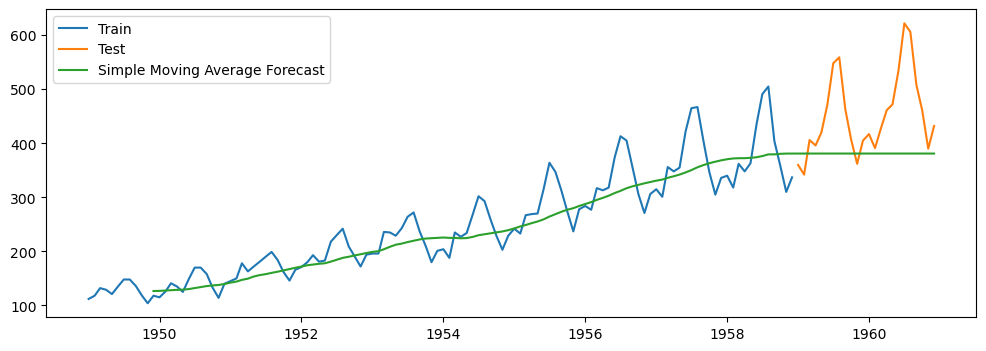

In [73]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label= 'Train')
plt.plot(test['Passengers'], label= 'Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple Moving Average Forecast')
plt.legend(loc='best')
plt.show()

### calculate RMSE and MPE

In [74]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sma['sma_forecast'][train_len:])).round(2)
rmse

103.33

In [75]:
y_hat_sma['sma_forecast'][train_len]

381.0

In [76]:
mape = np.round(np.mean(np.abs(test['Passengers'] - y_hat_sma['sma_forecast'][train_len:]) / test['Passengers']) *100, 2)
mape

15.54

In [77]:
# ma_window =6, Moving average window
y_hat_sma = airP.copy()
ma_window = 6
y_hat_sma['sma_forecast'] = airP['Passengers'].rolling(ma_window).mean()
y_hat_sma.tail(), y_hat_sma.head()

train_len = 120
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

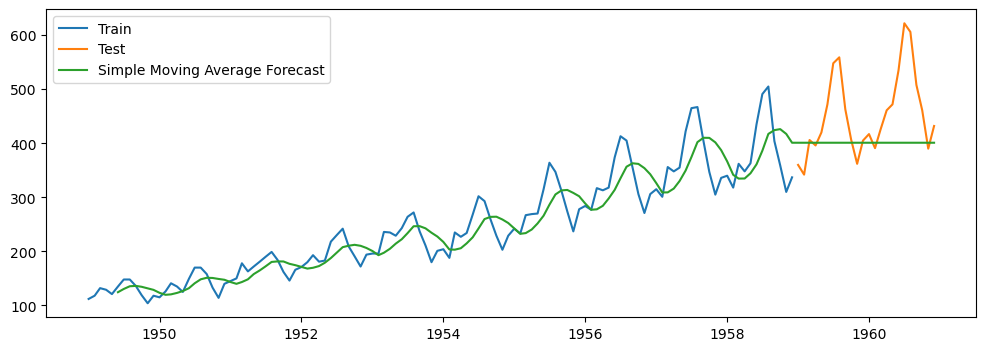

In [78]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label= 'Train')
plt.plot(test['Passengers'], label= 'Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [79]:
y_hat_sma_exercise = exercise_2.copy()
exercise_train = exercise_2[:212]
exercise_test = exercise_2[212:]
ma_window = 12
y_hat_sma_exercise['sma_forecast'] = y_hat_sma_exercise['Exchange Rate TWI'].rolling(ma_window).mean()

y_hat_sma_exercise['sma_forecast'][212:] = y_hat_sma_exercise['sma_forecast'][211]

In [80]:
exercise_test['Exchange Rate TWI'].isna().sum()

0

In [81]:
rmse = np.sqrt(mean_squared_error(exercise_test['Exchange Rate TWI'], y_hat_sma_exercise['sma_forecast'][212:])).round(2)
mape = np.round(np.mean(np.abs(exercise_test['Exchange Rate TWI'] - y_hat_sma_exercise['sma_forecast'][212:]) / exercise_test['Exchange Rate TWI']) *100, 2)
rmse, mape

(4.66, 6.96)

In [82]:
y_hat_sma_exercise = exercise_2.copy()
exercise_train = exercise_2[:212]
exercise_test = exercise_2[212:]
ma_window = 6
y_hat_sma_exercise['sma_forecast'] = y_hat_sma_exercise['Exchange Rate TWI'].rolling(ma_window).mean()

y_hat_sma_exercise['sma_forecast'][212:] = y_hat_sma_exercise['sma_forecast'][211]

In [83]:
rmse = np.sqrt(mean_squared_error(exercise_test['Exchange Rate TWI'], y_hat_sma_exercise['sma_forecast'][212:])).round(2)
mape = np.round(np.mean(np.abs(exercise_test['Exchange Rate TWI'] - y_hat_sma_exercise['sma_forecast'][212:]) / exercise_test['Exchange Rate TWI']) *100, 2)
rmse, mape

(4.9, 7.13)

### Simple Exponential Smoothing

In [84]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [85]:
model = SimpleExpSmoothing(train['Passengers'])

In [86]:
model_fit = model.fit(optimized=True)
#smoothing_level is alpha
#optimized if true it optimize the smoothing level

In [87]:
test.shape

(24, 1)

In [88]:
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)


In [89]:
y_hat_ses['ses_forecast'].tail()

Month
1960-08-01    337.0
1960-09-01    337.0
1960-10-01    337.0
1960-11-01    337.0
1960-12-01    337.0
Name: ses_forecast, dtype: float64

### plot

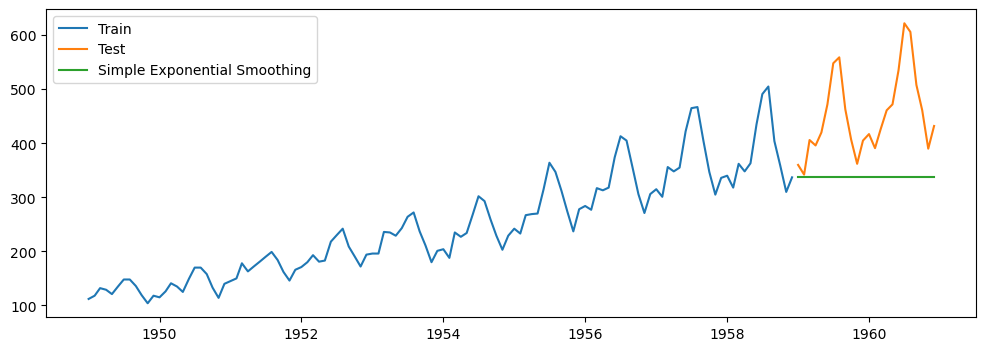

In [90]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label= 'Train')
plt.plot(test['Passengers'], label= 'Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple Exponential Smoothing')
plt.legend(loc='best')
plt.show()

In [91]:
exercise_3 = pd.read_csv('Daily+temperature+data.csv')

In [92]:
exercise_3.head()

,Date,Temperature(Min)
0,01-01-2017,14.3
1,01-02-2017,17.4
2,01-03-2017,18.5
3,01-04-2017,16.8
4,01-05-2017,11.5


In [93]:
train_temprature = exercise_3[:511]
test_temprature = exercise_3[511:]

model_temp = SimpleExpSmoothing(train_temprature['Temperature(Min)'])

In [94]:
model_fit = model_temp.fit(smoothing_level=0.2, optimized=False)
model_fit.params
y_hat_ses = test_temprature.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(219)

In [95]:
rmse = np.sqrt(mean_squared_error(test_temprature['Temperature(Min)'], y_hat_ses['ses_forecast'])).round(2)


In [96]:
rmse

3.56

In [97]:
mape = np.round(np.mean(np.abs(test_temprature['Temperature(Min)'] - y_hat_ses['ses_forecast']) / test_temprature['Temperature(Min)']) *100, 2)

In [98]:
mape

30.24

### Holte Exponential Smoothing

In [99]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [100]:
exp_model = ExponentialSmoothing(np.asarray(train_temprature['Temperature(Min)']), seasonal_periods=12, trend='additive', seasonal=None)

In [101]:
exp_model_fit = exp_model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)

In [102]:
print(exp_model_fit.params)

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 16.039999999999992, 'initial_trend': -0.26545454545454444, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [103]:
y_hat_holt = test_temprature.copy()
y_hat_holt['holt_forecast'] = exp_model_fit.forecast(219)

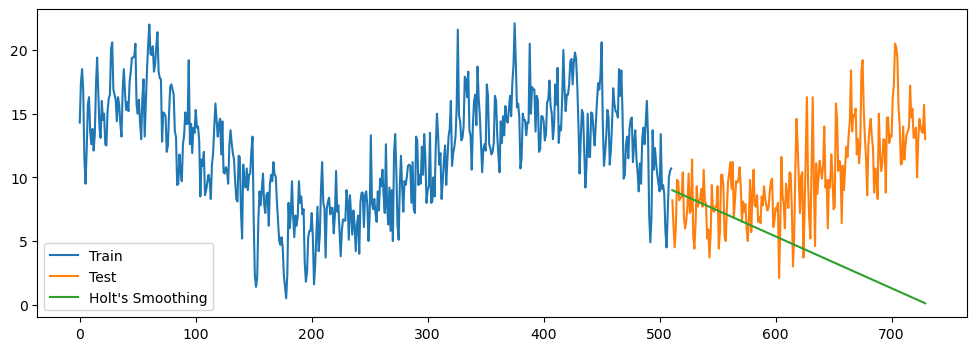

In [104]:
plt.figure(figsize=(12,4))
plt.plot(train_temprature['Temperature(Min)'], label= 'Train')
plt.plot(test_temprature['Temperature(Min)'], label= 'Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s Smoothing')
plt.legend(loc='best')
plt.show()

#### Holt Winter with Trend and Seasonality

In [114]:
test = airP[120:]
train = airP[:120]
y_hat_hwa = test.copy()
hwa_model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods=12, trend='add', seasonal='add')
hwa_model_fit = hwa_model.fit(optimized=True)
print(hwa_model_fit.params)

{'smoothing_level': 0.2361171978116132, 'smoothing_trend': 7.679615363850196e-11, 'smoothing_seasonal': 0.7638828018270181, 'damping_trend': nan, 'initial_level': 119.14045289095831, 'initial_trend': 2.2766888689244404, 'initial_seasons': array([ -9.41693238,  -3.89040624,   8.62486483,   3.53570972,
        -5.16150036,   8.98263745,  21.24863145,  19.32984306,
         5.24250075, -13.60564542, -28.28759186, -12.13664608]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [115]:
y_hat_hwa['hwa_forecast'] = hwa_model_fit.forecast(24)

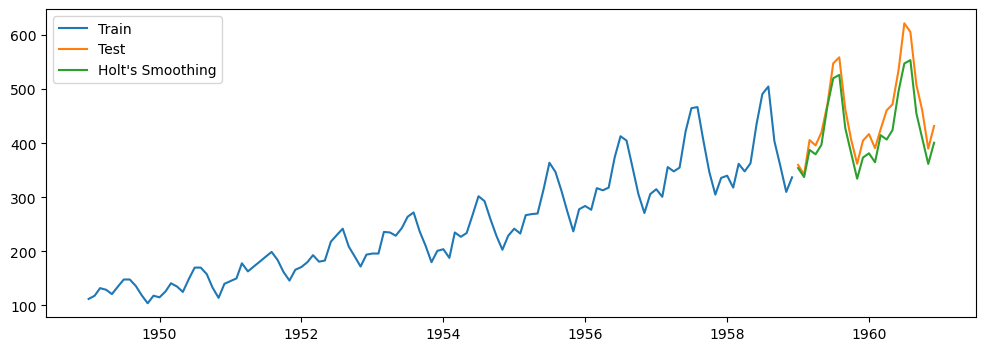

In [116]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label= 'Train')
plt.plot(test['Passengers'], label= 'Test')
plt.plot(y_hat_hwa['hwa_forecast'], label='Holt\'s Smoothing')
plt.legend(loc='best')
plt.show()

### exercise

In [120]:
exp_model = ExponentialSmoothing(np.asarray(train_temprature['Temperature(Min)']), seasonal_periods=30, trend='additive', seasonal='add')
exp_model_fit = exp_model.fit(optimized=True)
y_hat_holt = test_temprature.copy()
y_hat_holt['holt_forecast'] = exp_model_fit.forecast(219)

In [121]:
rmse = np.sqrt(mean_squared_error(test_temprature['Temperature(Min)'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_temprature['Temperature(Min)'] - y_hat_holt['holt_forecast']) / test_temprature['Temperature(Min)']) *100, 2)
rmse, mape

(4.14, 34.36)

### Graded question

In [128]:
bitcoin_data = pd.read_csv('bitcoinfinal+(4).csv', header=None)

In [123]:
bitcoin_data.isna().sum()

0        0
217.4    0
dtype: int64

In [129]:
bitcoin_data.head()

,0,1
0,0,217.4
1,1,255.7
2,2,244.3
3,3,236.1
4,4,228.7


In [146]:
#naive
train_len = 29
print(bitcoin_data[1][train_len-1])
train = bitcoin_data[:train_len]
print(train[1].mean())
test = bitcoin_data[train_len:]

2191.8
595.7517241379311


In [147]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train[1][train_len-1]

In [148]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train[1].mean()

In [150]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test[1], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test[1]-y_hat_naive['naive_forecast'])/test[1])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.9,27.12


In [152]:
rmse = np.sqrt(mean_squared_error(test[1], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test[1]-y_hat_avg['avg_forecast'])/test[1])*100,2)

results = pd.DataFrame({'Method':['Avg method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Avg method,2703.73,80.19


In [153]:
y_hat_avg['avg_forecast']

29    595.751724
30    595.751724
31    595.751724
Name: avg_forecast, dtype: float64

In [154]:
y_hat_naive['naive_forecast']

29    2191.8
30    2191.8
31    2191.8
Name: naive_forecast, dtype: float64

In [155]:
y_hat_sma = bitcoin_data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = bitcoin_data[1].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

In [156]:
rmse = np.sqrt(mean_squared_error(test[1], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test[1]-y_hat_sma['sma_forecast'][train_len:])/test[1])*100,2)

rmse, mape

(2338.94, 67.42)

In [157]:
ma_window = 6
y_hat_sma['sma_forecast'] = bitcoin_data[1].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

In [158]:
rmse = np.sqrt(mean_squared_error(test[1], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test[1]-y_hat_sma['sma_forecast'][train_len:])/test[1])*100,2)

rmse, mape

(2035.79, 56.61)

In [160]:
ma_window = 3
y_hat_sma['sma_forecast'] = bitcoin_data[1].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

rmse = np.sqrt(mean_squared_error(test[1], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test[1]-y_hat_sma['sma_forecast'][train_len:])/test[1])*100,2)

rmse, mape

(1794.92, 47.81)

In [162]:
test.shape

(3, 2)

In [163]:
model = SimpleExpSmoothing(train[1])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['opt_forecast'] = model_fit.forecast(3)

In [165]:
rmse = np.sqrt(mean_squared_error(test[1], y_hat_ses['opt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test[1]-y_hat_ses['opt_forecast'])/test[1])*100,2)

rmse, mape

(1268.86, 27.25)

In [166]:
model_fit.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 217.4,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [171]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train[1]) ,seasonal_periods=3 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(3)

{'smoothing_level': 0.9950517210446927, 'smoothing_trend': 0.43233248249505807, 'smoothing_seasonal': 9.794185542721287e-05, 'damping_trend': nan, 'initial_level': 207.38376669340138, 'initial_trend': 11.058267257446873, 'initial_seasons': array([-18.44232989,  17.15290339,   1.40628408]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [173]:
rmse = np.sqrt(mean_squared_error(test[1], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test[1]-y_hat_hwa['hw_forecast'])/test[1])*100,2)
rmse, mape

(500.38, 10.28)

In [174]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train[1]) ,seasonal_periods=3 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(3)

{'smoothing_level': 0.9888170810781358, 'smoothing_trend': 0.35692335823192617, 'smoothing_seasonal': 0.0001733376308952478, 'damping_trend': nan, 'initial_level': 192.78976813732518, 'initial_trend': 1.780373946787309, 'initial_seasons': array([1.10166311, 1.26084378, 1.14089546]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [175]:
rmse = np.sqrt(mean_squared_error(test[1], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test[1]-y_hat_hwa['hw_forecast'])/test[1])*100,2)
rmse, mape

(683.59, 15.14)